In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("candy-data.csv")

In [3]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [6]:
data.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [18]:
import seaborn as sns
import matplotlib.pylab as plt


<Figure size 3600x1080 with 0 Axes>

<Figure size 3600x1080 with 0 Axes>

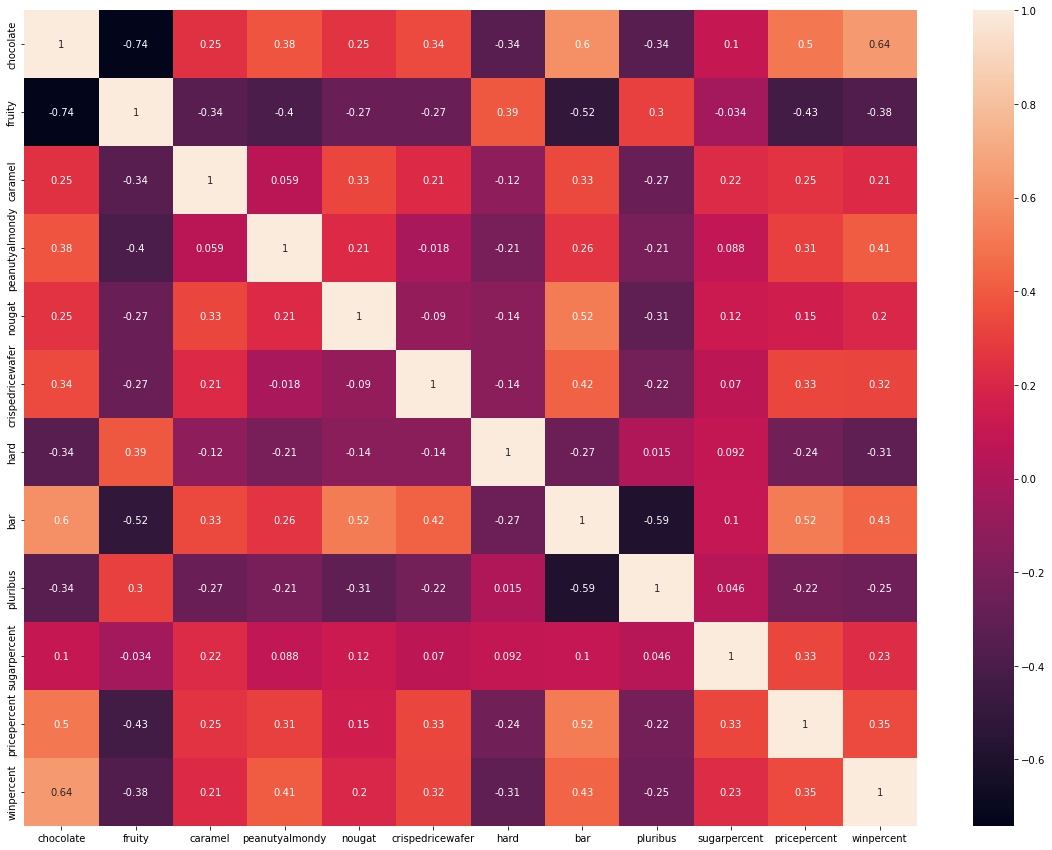

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, )
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
data.head(2)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936


In [36]:
x = data.drop(['competitorname','chocolate'], axis = 1)
y = data['chocolate']
data.shape

(85, 13)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [38]:
model = LogisticRegression(solver='newton-cg')

In [39]:
model.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [40]:
prediction = model.predict(x_test)

In [62]:
prediction

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1])

In [64]:
y_arr = np.array(y_test)

In [65]:
y_arr

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1])

In [66]:
from sklearn.metrics import confusion_matrix

In [68]:
matrix = confusion_matrix(y_test, prediction)

In [73]:
df_matrix = pd.DataFrame(matrix,index=['0','1'], columns=['0_pred','1_pred'])


<AxesSubplot:>

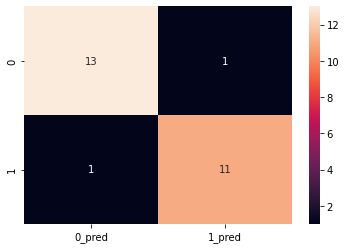

In [75]:
sns.heatmap(df_matrix, annot=True)